### 복습

In [1]:
import numpy as np
import os
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [2]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

In [5]:
count_vec = CountVectorizer()
tdm = count_vec.fit_transform(sent)
print(count_vec.vocabulary_)
print(tdm.toarray())

{'휴일': 16, '오늘': 7, '서쪽': 5, '중심': 12, '으로': 8, '폭염': 13, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 11, '피해서': 14, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 15}
[[0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1]
 [1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1]]


In [9]:
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(sent)
print(tfidf_vec.vocabulary_)
print(tfidf.toarray())

{'휴일': 16, '오늘': 7, '서쪽': 5, '중심': 12, '으로': 8, '폭염': 13, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 11, '피해서': 14, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 15}
[[0.         0.32412345 0.         0.         0.32412345 0.32412345
  0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
  0.32412345 0.2306165  0.         0.         0.2306165 ]
 [0.36469323 0.         0.36469323 0.36469323 0.         0.
  0.         0.         0.         0.         0.36469323 0.25948224
  0.         0.25948224 0.36469323 0.36469323 0.25948224]]


In [11]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [13]:
print(cosine_similarity(tfidf[0], tfidf[1]))
print(euclidean_distances(tfidf[0], tfidf[1]))

[[0.17952266]]
[[1.28099753]]


In [20]:
train_pos_path = '/home/jasper/.keras/datasets/aclImdb/train/pos/'
train_neg_path = '/home/jasper/.keras/datasets/aclImdb/train/neg/'

In [23]:
# os.listdir(train_pos_path)
data_pos = {}
data_pos['review'] = []

for i in os.listdir(train_pos_path):
    with open(train_pos_path + i, 'r', encoding = 'utf-8') as f:
        data_pos['review'].append(f.read())

data_pos = pd.DataFrame.from_dict(data_pos)

In [25]:
# os.listdir(train_pos_path)
data_neg = {}
data_neg['review'] = []

for i in os.listdir(train_neg_path):
    with open(train_neg_path + i, 'r', encoding = 'utf-8') as f:
        data_neg['review'].append(f.read())

data_neg = pd.DataFrame.from_dict(data_neg)

In [26]:
data_pos['sentiment'] = 1
data_neg['sentiment'] = 0

In [28]:
print(data_pos.head())
print(data_neg.head())

                                              review  sentiment
0  I would say that this film gives an insight to...          1
1  This is my favorite of the older Tom & Jerry c...          1
2  I find it so amazing that even after all these...          1
3  Debut? Wow--Cross-Eyed is easily one of the mo...          1
4  I first saw this movie when it came out in 199...          1
                                              review  sentiment
0  I loathed this film. The original Phantasm had...          0
1  but "Cinderella" gets my vote, not only for th...          0
2  I consider this film one of the worst in the N...          0
3  This movie still chills me to the bone thinkin...          0
4  As an Army veteran, I was deeply offended by t...          0


In [29]:
train_df = pd.concat([data_pos, data_neg], axis = 0)

In [31]:
print(train_df.shape)

(25000, 2)


In [32]:
review = train_df['review']

In [40]:
## word length EDA
tokenized_review = [r.split() for r in review]

In [42]:
print(len(tokenized_review))

25000


In [48]:
print(tokenized_review[0])

['I', 'would', 'say', 'that', 'this', 'film', 'gives', 'an', 'insight', 'to', 'the', 'trauma', 'that', 'a', 'young', 'mind', 'can', 'face', 'when', 'a', 'family', 'is', 'split', 'by', 'divorce', 'or', 'other', 'disaster.', 'I', 'would', 'highly', 'recommend', 'this', 'film', 'especially', 'to', 'parents', 'or', 'individuals', 'planning', 'to', 'have', 'a', 'family.<br', '/><br', '/>I', 'found', 'the', 'characters', 'to', 'be', 'appealing', 'and', 'highly', 'sympathetic', 'from', 'a', 'multitude', 'of', 'dimensions.<br', '/><br', '/>The', 'scary', 'monster', 'although', 'probably', 'not', 'scary', 'to', 'most', 'adults,', 'has', 'a', 'very', 'real', 'hint', 'of', 'what', 'the', 'overactive', 'imagination', 'of', 'a', 'child', 'who', 'is', 'facing', 'unknown', 'terrors', 'might', 'create.<br', '/><br', '/>I', 'found', 'the', 'film', 'to', 'be', 'delightful!']


In [43]:
tokenized_review_len = [len(t) for t in tokenized_review]

In [44]:
print(tokenized_review_len)

[99, 158, 436, 102, 314, 129, 221, 148, 110, 72, 25, 195, 159, 266, 516, 258, 663, 142, 613, 88, 469, 153, 140, 56, 162, 202, 74, 385, 131, 92, 125, 810, 126, 248, 149, 743, 77, 239, 211, 790, 261, 499, 86, 155, 147, 136, 207, 110, 147, 855, 168, 389, 454, 116, 220, 323, 370, 582, 108, 390, 119, 334, 72, 157, 313, 51, 176, 124, 714, 438, 250, 668, 293, 56, 120, 171, 467, 373, 190, 155, 306, 208, 156, 651, 126, 147, 283, 185, 202, 176, 235, 239, 124, 140, 475, 159, 118, 641, 178, 155, 125, 322, 213, 131, 170, 306, 325, 236, 105, 321, 131, 179, 291, 217, 203, 183, 133, 157, 375, 591, 169, 461, 196, 45, 119, 534, 156, 100, 205, 152, 160, 120, 81, 139, 300, 303, 285, 228, 720, 242, 234, 303, 54, 403, 131, 88, 179, 464, 124, 161, 176, 296, 168, 91, 158, 439, 107, 462, 170, 134, 120, 266, 144, 127, 98, 156, 125, 113, 419, 166, 87, 220, 83, 268, 220, 423, 119, 92, 364, 133, 140, 186, 109, 269, 117, 421, 144, 130, 138, 199, 126, 153, 156, 277, 203, 267, 52, 158, 153, 208, 66, 405, 67, 310, 126

In [50]:
alphabet_review= [a.replace(' ', '') for a in review]

In [51]:
alphabet_review_len = [len(a) for a in alphabet_review]

In [52]:
print(alphabet_review_len)

[473, 663, 2007, 512, 1339, 786, 1064, 684, 542, 394, 134, 851, 770, 1454, 2376, 1349, 3226, 634, 2967, 397, 2388, 839, 624, 264, 741, 963, 329, 1883, 587, 430, 519, 4048, 523, 1029, 625, 3685, 326, 1228, 922, 3549, 1152, 2203, 392, 656, 727, 525, 931, 540, 679, 4292, 697, 1902, 2209, 554, 1144, 1499, 1967, 2874, 457, 1886, 554, 1462, 294, 662, 1488, 254, 832, 516, 3380, 2230, 1233, 3291, 1250, 236, 589, 864, 2105, 1535, 863, 726, 1461, 868, 774, 2924, 561, 607, 1348, 824, 930, 849, 1060, 1166, 557, 563, 2135, 680, 583, 2990, 759, 715, 527, 1381, 947, 580, 767, 1416, 1434, 1058, 524, 1426, 624, 870, 1336, 980, 994, 793, 626, 738, 1853, 2696, 754, 2048, 909, 205, 504, 2678, 739, 542, 981, 633, 680, 573, 397, 609, 1347, 1255, 1503, 1037, 3684, 1021, 1116, 1478, 218, 1927, 570, 337, 855, 2228, 638, 732, 851, 1521, 724, 345, 814, 2143, 546, 2185, 850, 598, 544, 1251, 670, 573, 438, 715, 624, 511, 1993, 802, 375, 997, 331, 1438, 1105, 2077, 514, 372, 1708, 657, 651, 857, 496, 1254, 548, 200

In [5]:
## EDA 시작
import matplotlib.pyplot as plt

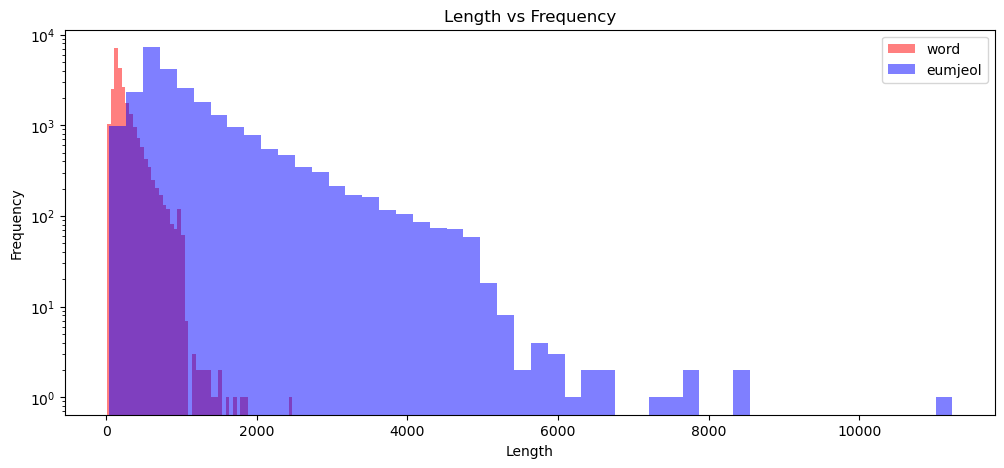

In [59]:
plt.figure(figsize=(12,5))
plt.hist(tokenized_review_len, bins=50, color='red', label='word', alpha = 0.5)
plt.hist(alphabet_review_len, bins=50, color='blue', label='eumjeol', alpha = 0.5)
plt.legend()
plt.yscale('log')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Length vs Frequency')
plt.show()

In [31]:
def word_summary(x, text):
    print(text + ' 최대 크기: {}'.format(np.max(x)))
    print(text + ' 최소 크기: {}'.format(np.min(x)))
    print(text + ' 평균 크기: {}'.format(np.mean(x)))
    print(text + ' 표준 편차: {}'.format(np.std(x)))
    print(text + ' 중간값: {}'.format(np.median(x)))
    print(text + ' 1사분위수: {}'.format(np.percentile(x, 25)))
    print(text + ' 3사분위수: {}'.format(np.percentile(x, 75)))

word_summary(tokenized_review_len, 'dd')

dd 최대 크기: 2470
dd 최소 크기: 10
dd 평균 크기: 233.78824
dd 표준 편차: 173.73034909796965
dd 중간값: 174.0
dd 1사분위수: 127.0
dd 3사분위수: 284.0


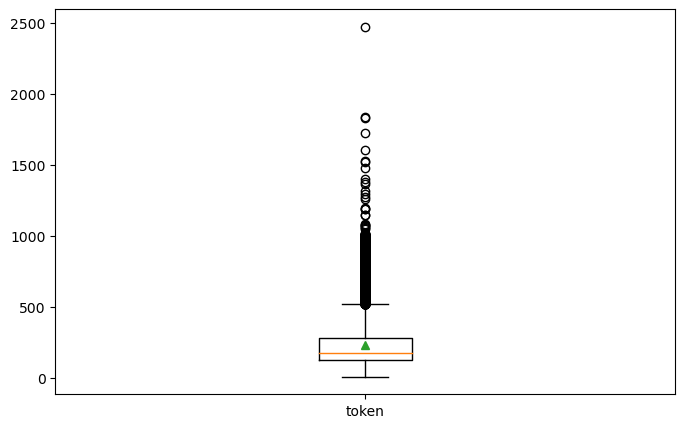

In [65]:
plt.figure(figsize=(8, 5))
plt.boxplot(tokenized_review_len, labels=['token'], showmeans=True)
plt.show()

In [2]:
from wordcloud import WordCloud, STOPWORDS

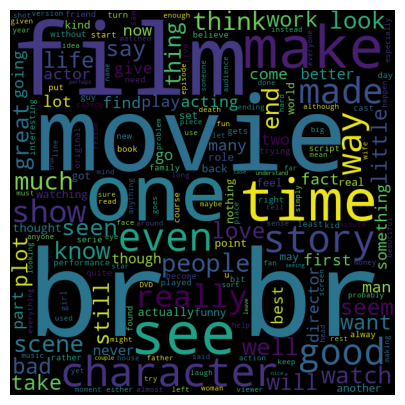

In [68]:
word_cloud = WordCloud(stopwords=STOPWORDS, width=600, height=600).generate(' '.join(review))
plt.figure(figsize=(8,5))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [3]:
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']
targets = np.array([[1], [0], [1], [1], [0], [1]])

[우분투 한글 폰트 적용](https://incomeplus.tistory.com/255)

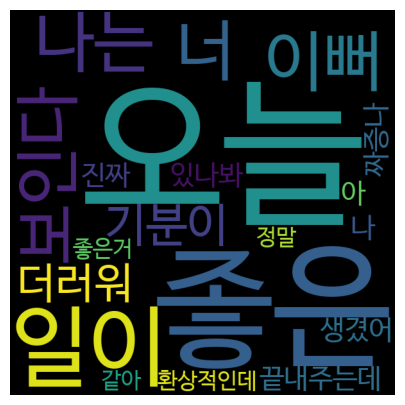

In [6]:
word_cloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', stopwords=STOPWORDS, width=600, height=600).generate(' '.join(samples))

plt.figure(figsize=(8,5))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [73]:
tokenizer_tf = tf.keras.preprocessing.text.Tokenizer()

In [78]:
tokenizer_tf.fit_on_texts(samples)
sequences = tokenizer_tf.texts_to_sequences(samples)
input_sequences = np.array(sequences)
print(tokenizer_tf.word_index)
print(input_sequences)

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}
[[ 4  1  5  6]
 [ 7  1  8  9]
 [10  2  3 11]
 [12  2  3 13]
 [14  1 15 16]
 [17 18 19 20]]


In [80]:
## tensorflow model
class mynlp(tf.keras.Model):
    def __init__(self, vocab_size, embed_size, hidden, outputs):
        super(mynlp, self).__init__(name = 'my_nlp')
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_size, name = 'embedding')
        self.hidden = tf.keras.layers.Dense(hidden, 'relu', name = 'dense')
        self.outputs = tf.keras.layers.Dense(outputs, 'sigmoid', name = 'output')
    def call(self, inputs):
        x = self.embed(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.hidden(x)
        x = self.outputs(x)

        return x
    


In [82]:
mymodel = mynlp(21, 100, 32, 1)

In [84]:
mymodel.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['acc'])
mymodel.fit(input_sequences, targets, epochs=100, batch_size=2)

Epoch 1/100
3/3 [==============================] - 2s 5ms/step - loss: 0.6915 - acc: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6792 - acc: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6692 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6594 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6498 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6402 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6287 - acc: 1.0000
Epoch 8/100


2023-03-15 10:38:15.040227: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 [==============================] - 0s 5ms/step - loss: 0.6168 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6036 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5900 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5740 - acc: 1.0000
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5570 - acc: 1.0000
Epoch 13/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5389 - acc: 1.0000
Epoch 14/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5179 - acc: 1.0000
Epoch 15/100
3/3 [==============================] - 0s 7ms/step - loss: 0.4961 - acc: 1.0000
Epoch 16/100
3/3 [==============================] - 0s 7ms/step - loss: 0.4728 - acc: 1.0000
Epoch 17/100
3/3 [==============================] - 0s 8ms/step - loss: 0.4465 - acc: 1.0000
Epoch 18/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4210 - ac

In [85]:
from konlpy.tag import Okt

In [87]:
text = '한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ'

In [88]:
okt = Okt()

In [92]:
print(okt.nouns(text))
print(okt.morphs(text))
print(okt.phrases(text))
print(okt.pos(text))

['한글', '자연어', '처리', '이제']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [93]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [94]:
sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."

In [95]:
print(word_tokenize(sentence))
print(sent_tokenize(sentence))

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']
['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.']


### 4. 텍스트 분류

In [8]:
! kaggle competitions download -c word2vec-nlp-tutorial

100%|██████████████████████████████████████| 51.7M/51.7M [00:04<00:00, 11.6MB/s]
100%|██████████████████████████████████████| 51.7M/51.7M [00:04<00:00, 11.5MB/s]


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('./data_in/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3) # tab 으로 구분되어 있음

In [11]:
train_data.head()

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [3]:
## word EDA (word 길이를 사용하는데는 벡터의 길이 정할때 사용함)
review = train_data['review']
tokenized_review_len = [len(r.split()) for r in review]
alphabet_review_len = [len(r.replace(' ', '')) for r in review]

In [19]:
print(tokenized_review_len)
print(alphabet_review_len)

[433, 158, 378, 379, 367, 89, 112, 132, 163, 43, 48, 172, 382, 130, 112, 187, 395, 456, 241, 118, 231, 274, 254, 43, 38, 141, 225, 254, 670, 123, 54, 116, 120, 328, 373, 284, 135, 115, 169, 542, 250, 140, 121, 174, 164, 115, 80, 134, 252, 194, 161, 97, 212, 140, 57, 139, 148, 170, 72, 379, 515, 226, 132, 137, 122, 55, 968, 73, 194, 129, 128, 425, 184, 185, 130, 146, 263, 92, 192, 138, 133, 273, 420, 191, 428, 294, 346, 51, 124, 110, 107, 117, 124, 136, 136, 141, 165, 73, 197, 84, 215, 869, 94, 165, 48, 107, 125, 121, 361, 423, 183, 208, 321, 69, 117, 227, 124, 156, 106, 127, 187, 365, 136, 274, 337, 804, 463, 325, 111, 214, 133, 618, 166, 569, 425, 26, 328, 177, 168, 136, 166, 272, 165, 156, 255, 184, 169, 281, 334, 113, 83, 179, 161, 313, 288, 97, 225, 351, 453, 167, 344, 219, 104, 141, 243, 132, 933, 136, 112, 153, 171, 216, 282, 143, 440, 133, 349, 130, 152, 222, 445, 418, 789, 126, 221, 138, 85, 395, 119, 135, 771, 106, 67, 157, 74, 278, 74, 276, 224, 102, 110, 241, 121, 272, 874, 

In [4]:
train_len = train_data['review'].str.replace(' ', '').apply(len) # alphabet_review_len과 똑같음
print(train_len)

0        1872
1         791
2        2074
3        1869
4        1867
         ... 
24995     488
24996     804
24997     517
24998     947
24999     761
Name: review, Length: 25000, dtype: int64


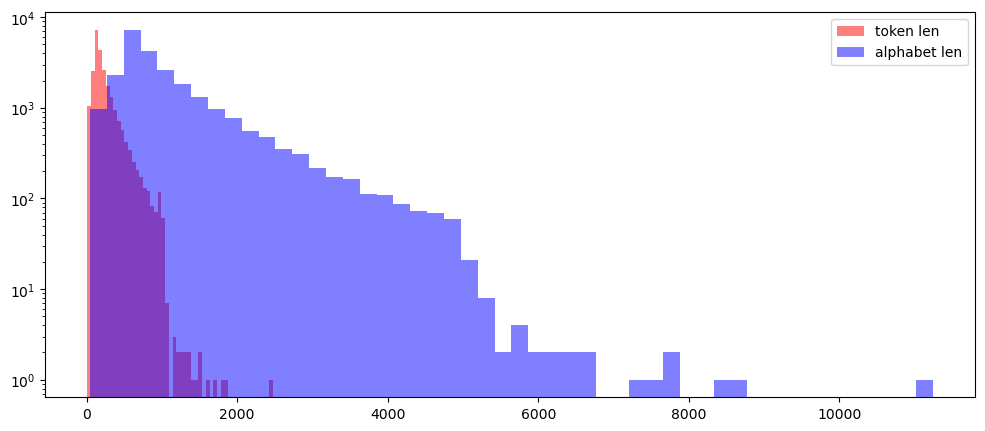

In [29]:
plt.figure(figsize=(12,5))
plt.hist(tokenized_review_len, bins = 50, color = 'red', alpha = 0.5, label= 'token len')
plt.hist(alphabet_review_len, bins = 50, color = 'blue', alpha = 0.5, label= 'alphabet len')
plt.yscale('log')
plt.legend()
plt.show()

In [37]:
word_summary(tokenized_review_len, 'word') # 평균 혹은 중간값으로 설정함 (vocab_size 설정 시)
print()
word_summary(alphabet_review_len, 'alphabet')

word 최대 크기: 2470
word 최소 크기: 10
word 평균 크기: 233.78824
word 표준 편차: 173.73034909796965
word 중간값: 174.0
word 1사분위수: 127.0
word 3사분위수: 284.0

alphabet 최대 크기: 11241
alphabet 최소 크기: 45
alphabet 평균 크기: 1096.92432
alphabet 표준 편차: 832.1568658086874
alphabet 중간값: 809.0
alphabet 1사분위수: 579.0
alphabet 3사분위수: 1335.25


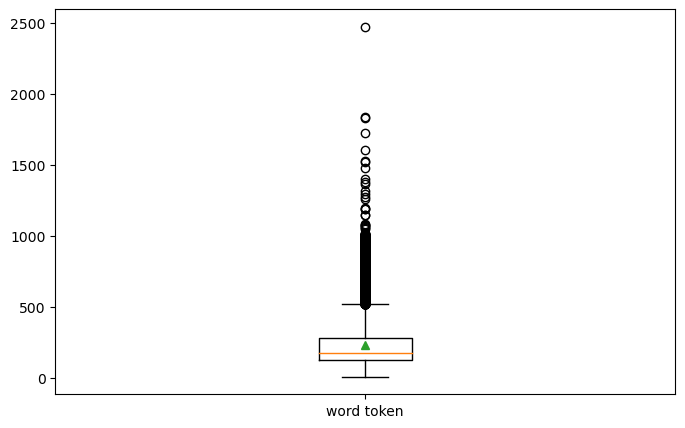

In [39]:
plt.figure(figsize=(8,5))
plt.boxplot(tokenized_review_len, labels=['word token'], showmeans=True)
plt.show()

In [5]:
from wordcloud import WordCloud, STOPWORDS

In [58]:
type(STOPWORDS)
my_stopwords = ['br', 'movie', 'see', 'film', 'make', 'one', 'time', 'story', 'movies', 'people', 'much', 'scene', 'made', 'take', 'end', 'show', 'way', 'take', 'say','character','even','think','first','know','watch','look','really','films','seen','plot','charactgers','life','acting','actor','little','actor','acting','still','work','many','characters','want','going','makes','thing','something','two','director','find','give','now','part','man','another'] + list(STOPWORDS)

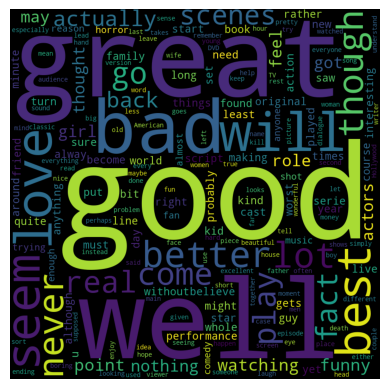

In [60]:
word_cloud = WordCloud(stopwords=my_stopwords, width=800, height=800).generate(' '.join(review))

plt.figure()
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

#### 긍정 부정 데이터 분포

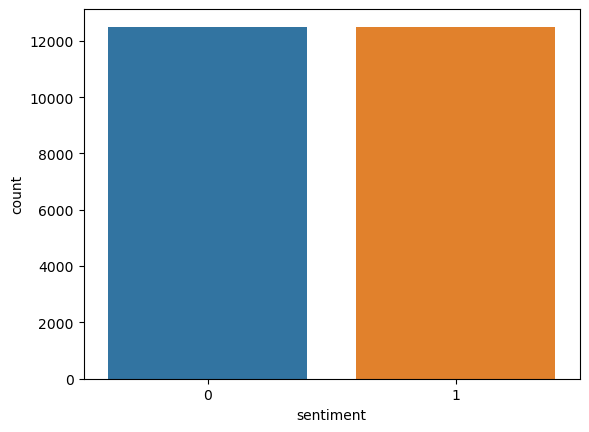

In [8]:
a = sns.countplot(x = 'sentiment', data = train_data)

In [10]:
train_data['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [74]:
df = pd.DataFrame([[1,2], [3,4]], columns=['A', 'B'])
# print(df)

In [75]:
def add_one(x):
    x += 1
    return x

In [60]:
add_one(df)

A   B
0  46  47
1  48  49

In [76]:
# df['A'] = df['A'].apply(add_one)
df = df['A'].apply(lambda x: x+1)

In [77]:
print(df)

0    2
1    4
Name: A, dtype: int64


In [78]:
train_word_counts = train_data['review'].apply(lambda x: len(x.split()))

In [79]:
print(train_word_counts)

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64


In [90]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 있는가 true or false
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
captial_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) # 첫 번째가 대문자 인가
capitals = np.mean(train_data['review'].apply(lambda x: np.max([y.isupper() for y in x]))) # 문장의 어딘가에 대문자가 있는가
numbers = np.mean(train_data['review'].apply(lambda x: np.max([y.isdigit() for y in x])))

In [92]:
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(captial_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%


#### 데이터 전처리

In [4]:
from bs4 import BeautifulSoup # / br 등 처리 가능
import re

In [5]:
print(train_data.shape)
print(train_data.head())

(25000, 3)
         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...


In [6]:
train_data['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [7]:
# 불용어 삭제
from nltk.corpus import stopwords

In [7]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
review = train_data['review'][0]
print(review)

## bs
review_bs = BeautifulSoup(review).get_text()
print(review_bs)

## re.sub
review_text = re.sub('[^a-zA-Z]', ' ', review_bs) # 알파벳이 아닌 것을 전부 빈칸으로 변경 (" , . ?)
print(review_text)

## stopwords
stop_words = stopwords.words('english')
review_text_lower = review_text.lower() # stopwords가 소문자이기 때문에 소문자로 변경
words = review_text_lower.split()

review_words = [w for w in words if not w in stop_words]
print(review_words)

## join
clean_review = ' '.join(review_words)
print(clean_review)

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [8]:
def preprocessing(review, remove_stops = False):
    # html 태그 제거
    review_bs = BeautifulSoup(review).get_text()

    # 특수문자 제거
    review_sub = re.sub('[^a-zA-Z]', ' ', review_bs)

    

    # stopwords
    if remove_stops:
        # 불용어 제거
        stop_words = stopwords.words('english')

        # 소문자로 바꾸고 split
        review_sub_lower = review_sub.lower()
        review_sub_lower_split = review_sub_lower.split()
        words = [w for w in review_sub_lower_split if not w in stop_words]

        clean_review = ' '.join(words)
    else:
        clean_review = ' '.join(review_sub)
    
    return clean_review

In [9]:
clean_train_reviews = []

for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stops=True))

clean_train_reviews[0]

/home/jasper/anaconda3/envs/nlp/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [20]:
print(type(clean_train_reviews))
print(len(clean_train_reviews))
print(clean_train_reviews[-1])

<class 'list'>
25000
saw movie child broke heart story unfinished ending grew many great anime movies one favourites unusual story unfairness cruelty loneliness life choices undone need others chirin made alone wolf kills mother wolf alone chirin follows mountain wolf kill lamb even though night says maybe eat tomorrow tape broken degraded age use repair watch movie someday cry hard child stories like depth feeling intricacy meaning rare sad story never encountered catharsis beautifully made glad seen movie glad saw child


In [10]:
## tokenizer 벡터화
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
print(len(text_sequences[0]))

219


In [26]:
print(tokenizer.word_index)
print(len(tokenizer.word_index))

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

In [12]:
word_vocab = tokenizer.word_index
word_vocab['<PAD>'] = 0
print(word_vocab)

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

In [13]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [14]:
print(data_configs)

{'vocab': {'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'thing

In [15]:
MAX_SEQUENCE = 174 # 문장최대길이. 해당 길이로 자른다.as_integer_ratio

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE, padding='post') # post 뒤쪽 방향으로 패딩 진행

print(train_inputs.shape)
print(train_inputs[1])

(25000, 174)
[  232   203  3048  3565  7116   317     2   405   153    19   634 10967
 11898  8816  1653  1035  3494   232   154   314  7116  2701   178     2
  2349    87  1111   582   217  2219   149    73   160   626  1035  2882
   194   642  3316  3464  3869   154   405   180   155   158    79     1
 19718  2177  1251    68  6828   170   281   811     1   532 10968     4
  2003    16    36   881  1251   376   634   314  7116   159  2564  1653
  1035  3494   232   511   143   317    20   623  4628  1251  8974  5471
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0  

In [16]:
train_labels = np.array(train_data['sentiment'])
print(len(train_labels))

25000


In [17]:
# 넘파이 배열 파일로 저장
np.save('./data_in/train_input.npy', train_inputs)
np.save('./data_in/train_label.npy', train_labels)

In [18]:
import json
json.dump(data_configs, open('./data_in/data_config.json', 'w'), ensure_ascii=False)

In [21]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})

In [22]:
clean_train_df.to_csv('./data_in/clean_train_df.csv', index=False)

### 테스트 데이터 전처리

In [19]:
test_data = pd.read_csv('./data_in/testData.tsv', header=0, delimiter='\t', quoting=3)
test_data.head()

id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...

In [20]:
clean_test_reviews = []

In [24]:
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stops=True))
clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE, padding='post')


/home/jasper/anaconda3/envs/nlp/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [25]:
# 넘파이 배열 파일로 저장
np.save('./data_in/test_input.npy', test_inputs)
np.save('./data_in/test_id.npy', test_id)
clean_test_df.to_csv('./data_in/clean_test_df.csv', index=False)

### 회귀 모델 테스트

In [2]:
## logistic regression
import numpy as np
import pandas as pd
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
train_data = pd.read_csv('./data_in/clean_train_df.csv', header= 0)
train_data.head()

review  sentiment
0  stuff going moment mj started listening music ...          1
1  classic war worlds timothy hines entertaining ...          1
2  film starts manager nicholas bell giving welco...          0
3  must assumed praised film greatest filmed oper...          0
4  superbly trashy wondrously unpretentious explo...          1

In [4]:
reviews = train_data['review']
sentiments = train_data['sentiment']

In [9]:
tfidf_vec = TfidfVectorizer(min_df=0, analyzer='char', ngram_range=(1,3), max_features=5000) # n_gram 1개씩(unigram)하고나서 3개씩(trigram) 한다
X = tfidf_vec.fit(reviews)
X = tfidf_vec.transform(reviews)
y = np.array(sentiments)

# print(X[0].toarray())

In [11]:
tfidf_vec.vocabulary_.keys()

dict_keys(['s', 't', 'u', 'f', ' ', 'g', 'o', 'i', 'n', 'm', 'e', 'j', 'a', 'r', 'd', 'l', 'c', 'w', 'h', 'y', 'z', 'k', 'b', 'p', 'v', 'x', 'q', 'st', 'tu', 'uf', 'ff', 'f ', ' g', 'go', 'oi', 'in', 'ng', 'g ', ' m', 'mo', 'om', 'me', 'en', 'nt', 't ', 'j ', ' s', 'ta', 'ar', 'rt', 'te', 'ed', 'd ', ' l', 'li', 'is', 'ni', 'mu', 'us', 'si', 'ic', 'c ', ' w', 'wa', 'at', 'tc', 'ch', 'hi', ' o', 'od', 'dd', ' d', 'do', 'oc', 'cu', 'um', 'ry', 'y ', 'he', 'wi', 'iz', 'z ', 'oo', 'on', 'nw', 'al', 'lk', 'ke', 'er', 'r ', 'ma', 'ay', 'yb', 'be', 'e ', 'an', 'ge', 'et', ' c', 'ce', 'ai', 'n ', ' i', 'ns', 'ig', 'gh', 'ht', 'gu', 'uy', ' t', 'th', 'ho', 'ou', 'ug', ' r', 're', 'ea', 'll', 'ly', 'co', 'ol', 'l ', ' e', 'ei', 'ti', 'ie', 'es', 's ', 'ak', 'mi', 'nd', 'wh', 'ui', 'il', 'lt', 'ty', 'nn', 'no', ' p', 'pa', ' b', 'bi', 'io', 'og', 'gr', 'ra', 'ap', 'ph', 'hy', ' f', 'fe', 'ur', 'fi', 'lm', 'm ', 'em', 'mb', 'se', 'ee', 'ci', 'ne', 'a ', 'or', 'ri', 'gi', 'na', 'el', 'le', 'as', 's

In [15]:
print(reviews[0])
print(X[0].toarray())
print(X[0].shape)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [16]:
TEST_SPLIT = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SPLIT, random_state=42)

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20000, 5000) (20000,)
(5000, 5000) (5000,)


In [20]:
lgs = LogisticRegression(max_iter=1000)
lgs.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
predicted = lgs.predict(X_test)
predicted[:100]

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [23]:
predicted_proba = lgs.predict_proba(X_test)
predicted_proba[:100]

array([[0.8660597 , 0.1339403 ],
       [0.31870449, 0.68129551],
       [0.82165083, 0.17834917],
       [0.16903435, 0.83096565],
       [0.96623521, 0.03376479],
       [0.10294805, 0.89705195],
       [0.2864797 , 0.7135203 ],
       [0.46629095, 0.53370905],
       [0.91051333, 0.08948667],
       [0.52063879, 0.47936121],
       [0.56195694, 0.43804306],
       [0.78717694, 0.21282306],
       [0.50960832, 0.49039168],
       [0.25933863, 0.74066137],
       [0.58315403, 0.41684597],
       [0.34935087, 0.65064913],
       [0.73337231, 0.26662769],
       [0.03844842, 0.96155158],
       [0.27674682, 0.72325318],
       [0.3780421 , 0.6219579 ],
       [0.2883331 , 0.7116669 ],
       [0.98987353, 0.01012647],
       [0.66575557, 0.33424443],
       [0.44500351, 0.55499649],
       [0.04118112, 0.95881888],
       [0.50506491, 0.49493509],
       [0.29447192, 0.70552808],
       [0.20426746, 0.79573254],
       [0.48211856, 0.51788144],
       [0.34638721, 0.65361279],
       [0.

In [24]:
lgs.score(X_test, y_test)

0.833

In [28]:
# test_data = pd.read_csv('./data_in/clean_test_df.csv', header=0, delimiter='\t', quoting=3)
test_data = pd.read_csv('./data_in/clean_test_df.csv')

In [29]:
test_data.head()

review          id
0  naturally film main themes mortality nostalgia...  "12311_10"
1  movie disaster within disaster film full great...    "8348_2"
2  movie kids saw tonight child loved one point k...    "5828_4"
3  afraid dark left impression several different ...    "7186_2"
4  accurate depiction small time mob life filmed ...   "12128_7"

In [30]:
test_vec = tfidf_vec.transform(test_data['review'])


In [31]:
test_predicted = lgs.predict(test_vec)
print(test_predicted)

[1 0 1 ... 1 1 0]


In [34]:
ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id': ids, 'sentiment': test_predicted})
answer_dataset.to_csv('./data_out/lgs_tfidf_answer.csv', index=False, quoting=3)